<h1><center>LINMA2472: Homework 1</center></h1>

<h2>Preprocessing</h2>

In [1]:

import spacy
import re
from pathlib import Path
import ftfy
import numpy as np
import networkx as nx
import nltk
import sys
import glob
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.cm as cm
#import matplotlib.pyplot as plt
import random
from matplotlib import pyplot as plt, animation
import glob
import os
import scipy
import community.community_louvain as community_louvain
import time
#!{sys.executable} -m pip install python-louvain
#!{sys.executable} -m pip install louvain
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m pip install ftfy
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install Pillow
#!{sys.executable} -m pip install sklearn
#!{sys.executable} -m pip install nltk

#List of all names covered in the two first chapters of the Bible
allnames=['Pison', 'Hiddekel', 'Adam', 'Eve', 'Cain', 'Enoch', 'Irad', 'Methusael', 'Lamech', 'Zillah', 'Seth', 'Enos', 'Methuselah', 'Noah', 'Canaan', 'Shem', 'Cush', 'Mizraim', 'Heth', 'Gether', 'Salah', 'Eber', 'Peleg', 'Jerah', 'Uzal', 'Diklah', 'Obal', 'Terah', 'Abram', 'Haran', 'Lot', 'Sarai', 'Shinab', 'Zoar', 'Dan', 'Sarah', 'Benammi', 'Nahor', 'Buz', 'Kemuel', 'Chesed', 'Jidlaph', 'Rebekah', 'Laban', 'Zimran', 'Medan', 'Jokshan', 'Sheba', 'Epher', 'Abidah', 'Isaac', 'Ishmael', 'Rachel', 'Bilhah', 'Levi', 'Jacob', 'Asher', 'Reuben', 'Zebulun', 'Dinah', 'Joseph', 'Deborah', 'Benjamin', 'Naphtali', 'Korah', 'Omar', 'Zepho', 'Zerah', 'Jaalam', 'Lotan', 'Shobal', 'Dishan', 'Samlah', 'Baalhanan', 'Mehetabel', 'Hirah', 'Onan', 'Pharez', 'Jachin', 'Shaul', 'Arodi', 'Malchiel', 'Belah', 'Jordan', 'Ephron', 'Machir', 'Abraham', 'Aaron', 'Jethro', 'Zipporah', 'Shimi', 'Elzaphan', 'Eleazar', 'Miriam', 'Hur', 'Joshua', 'Eliezer']
lg_allnames = len(allnames)




In [2]:
def get_index(list_name):
    """Return the list of indices, in the global list of names, of the names in list_name
    """
    list_index=[]

    for i in list_name:
        for j in range(lg_allnames):
            if(i==allnames[j]):
                list_index.append(j)

    return list_index

In [3]:
def update_matrix(names, matrix_occ, matrix_diag):
    """Based on a list of names, update the matrix of occurence and the diagonal matrix
    Param
    -----------
    names : [str] List of names
    matrix_occ : [[int]] matrix containing 1 if 2 caracters been mentionned in a same verset
    matrix_diag : [[int]] matrix diagonal containing the degree of each nodes (the number of contacts with others characters)
    """
    if names:
        list_index = get_index(names)

        for i in range(len(list_index)-1):
            for j in range(i+1,len(list_index)):
                # Verify if the two characters not been mentionned in a same verset before
                if(matrix_occ[list_index[i]][list_index[j]]==0):
                    # Adding the fact that these two characters has been mentionned
                    matrix_occ[list_index[j]][list_index[i]]=1
                    matrix_occ[list_index[i]][list_index[j]]=1
                    # Add another new connection for the 2 characters
                    matrix_diag[list_index[i]][list_index[i]]+=1
                    matrix_diag[list_index[j]][list_index[j]]+=1
        
    return matrix_occ, matrix_diag


In [4]:

def extract_names(path):
    """Create the adjency matrix and the diagonal matrix based on the book"""
    # Load the text document in a list of verset
    doc = Path(path, encoding='cp1252').read_text(encoding='cp1252').split('\n\n')

    matrix_occ = np.zeros((lg_allnames, lg_allnames), dtype=np.int32)
    matrix_diag = np.zeros((lg_allnames,lg_allnames), dtype=np.int32)

    for i in range(len(doc)):
        # Preprocess and clean each verset
        doc[i]= re.sub(' +', ' ', ftfy.fix_text(doc[i]))
        doc[i]= re.sub('\n', ' ', doc[i])
        doc[i]= re.sub('\'', ' ', doc[i])
        verses = nltk.word_tokenize(doc[i])

        # Init the key i to get all names present in the verset ith
        names_by_verset = []
        #text1= NER(doc[i])

        # Incorpore each name once in the dictionnary at the ith position
        for word in verses:
            #if(word.label == "PERSON"):
            if(word in allnames):
                if(word not in names_by_verset):
                    names_by_verset.append(word)

        matrix_occ, matrix_diag =update_matrix(names_by_verset, matrix_occ, matrix_diag)
    return matrix_occ, matrix_diag

#matrix_occ, matrix_diag = extract_names('bible12_n.txt')


*Get back the matrix in our environment without extracting again*

In [5]:
matrix_occ = np.loadtxt("matrix_occ(1).txt").reshape(lg_allnames, lg_allnames)
matrix_diag = np.loadtxt("matrix_D(1).txt").reshape(lg_allnames, lg_allnames)

<h2>Visualisation</h2>

/var/folders/gj/3zjx0x1d3x3bj6bfrlgym5fw0000gs/T/ipykernel_3145/2816956486.py:12: RuntimeWarning: divide by zero encountered in log
  matrix = np.log(matrix)


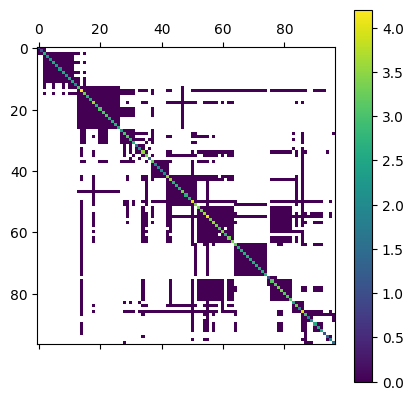

In [6]:

def plot_matrix(matrix):
    """Plot the co-occurences matrix"""
    # Inverse certains intensities to get a better visualisation
    for i in range (len(matrix)):
        for j in range (len(matrix)):
            if (i!=j):
                if (matrix[i][j]==0 ):
                    matrix[i][j] =1
                elif (matrix[i][j]==1 ):
                    matrix[i][j] =0

    matrix = np.log(matrix)
    plt.matshow(matrix)
    plt.colorbar()
    plt.show()

plot_matrix(matrix_diag-matrix_occ+1)

In [7]:
def create_graph(matrix):
    """Create graph based on the co-occurences matrix"""
    length_Matrix = len(matrix)
    G = nx.Graph()
    G.clear()

    G.add_nodes_from([i for i in range(length_Matrix)], weight = [matrix[i][i] for i in range(length_Matrix)])

    for j in range(length_Matrix-1):
        for k in range (j+1,length_Matrix,1):
            if(matrix[j][k]!=0):
                G.add_edge(j,k)
    return G

graph_net = create_graph(matrix_diag+matrix_occ)
# Assortativity
print(nx.degree_assortativity_coefficient(graph_net))

def color_by_degree():
    """Plot the graph with colors of nodes based on degree"""

    cmap = plt.cm.get_cmap('hot', 66 + 1)

    # Get degrees for each node
    degrees= []
    for i in range (len (graph_net.degree())):
        degrees.append(graph_net.degree()[i])
    print(degrees)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = 0, vmax=70))
    sm._A = []
    ax = plt.gca()
    nx.draw(graph_net, nx.spring_layout(graph_net,seed=41),cmap=cmap, node_color=degrees, node_size=20, width=0.5)
    plt.colorbar(sm, ax=ax)



-0.010795958540375381


average degree = 17.711340206185568


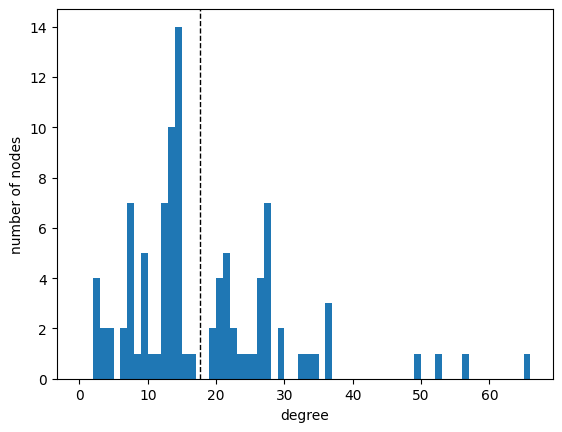

In [8]:

def display_histo(matrix):
    """Display a histo of the degree's frequencies
    """

    maximum = int(matrix.max())

    diagoV = [matrix[i][i] for i in range (len (matrix))]
    average = sum(diagoV) / len(diagoV)
    
    print("average degree = " + str (average))
    plt.hist(diagoV,bins = list(range(0,int(maximum)+1)))
    plt.axvline(average, color='k', linestyle='dashed', linewidth=1)
    plt.ylabel('number of nodes')
    plt.xlabel("degree")
    plt.show()

display_histo(matrix_diag)

<h2>Communities</h2>

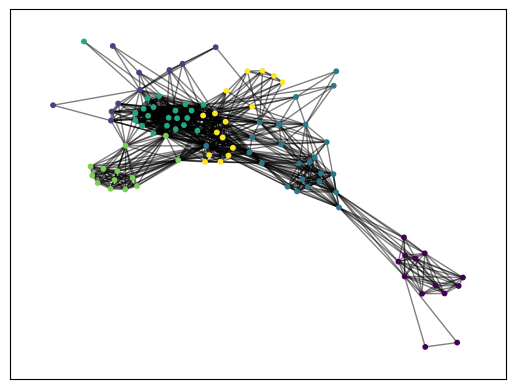

In [9]:
def louvain(G):
    """Create partitions of the graph G based on the Louvain algorithme and plot it"""
    partitions = []
    partition = community_louvain.best_partition(G)
        
    pos = nx.spring_layout(G, seed=41)
    #color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=10,cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    #Create list of nodes by partition
    for i in range (max(partition.values())+1):
        partitions.append([])
        for j in range (len (partition)):
            if partition.get(j) == i:
                partitions[i].append(j)
    plt.show()
    return partitions

partitions = louvain(graph_net)



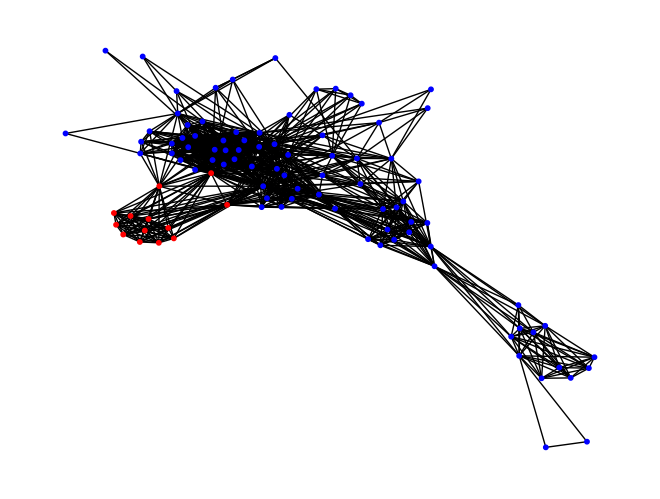

In [10]:

def color_commuity(community_index, names_print):
    """Display graph with nodes in partition selected in red"""
    color_map=[]

    for node in graph_net:
        if node in partitions[community_index]:
            color_map.append('red')
        else:
            color_map.append('blue')

    pos = nx.spring_layout(graph_net, seed=41)
    nx.draw(graph_net,pos=pos,node_color=color_map,node_size=10)

    if(names_print):
        for i in range (len (partitions[community_index])):
            print(allnames[partitions[community_index][i]])

color_commuity(4, False)



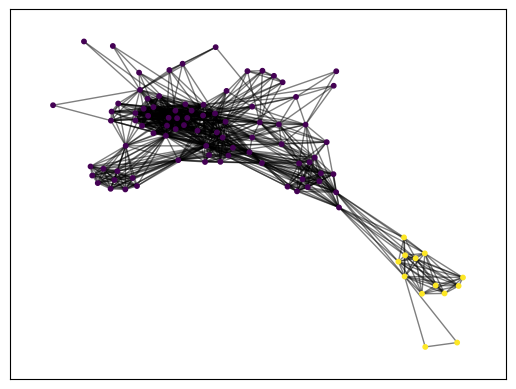

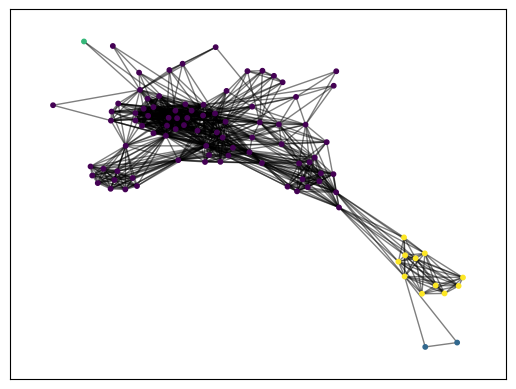

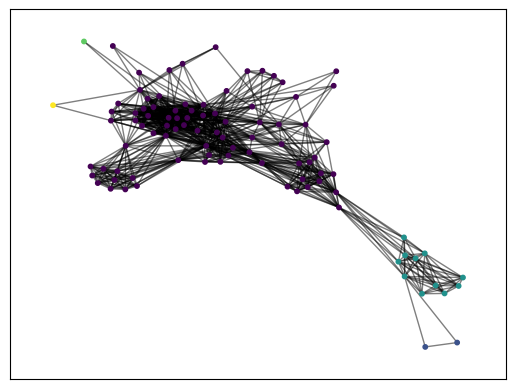

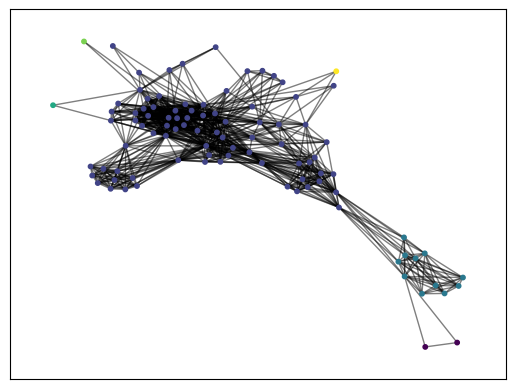

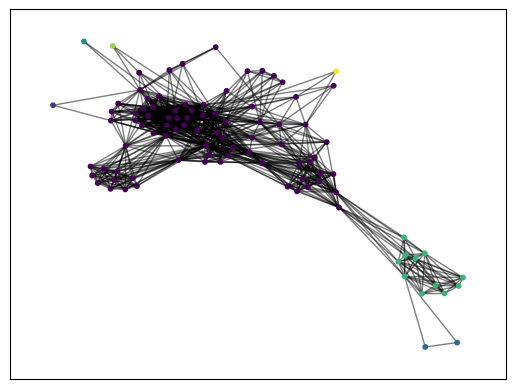

In [11]:

def laplace (k):
    """Display Laplace spectral clustering based on k=number of cluster"""
    
    lapl_matrix = matrix_diag - matrix_occ

    # eigenvalues and eigenvectors
    vals, vecs = scipy.linalg.eigh(lapl_matrix)

    # sort these based on the eigenvalues
    vecs = vecs[:,np.argsort(vals)]
    vals = vals[np.argsort(vals)]

    # kmeans on first three vectors with nonzero eigenvalues
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vecs[:,1:k])
    colors = kmeans.labels_
    
    G = create_graph(np.abs(lapl_matrix))
    pos = nx.spring_layout(G, seed=41)

    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(colors) + 1)
    nx.draw_networkx_nodes(G, pos, node_size=10,cmap=cmap, node_color=list(colors))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    
laplace(2)
laplace(4)
laplace(5)
laplace(6)
laplace(7)

<h2>Maximising the influence in the graph</h2>

*Independent cascade model*

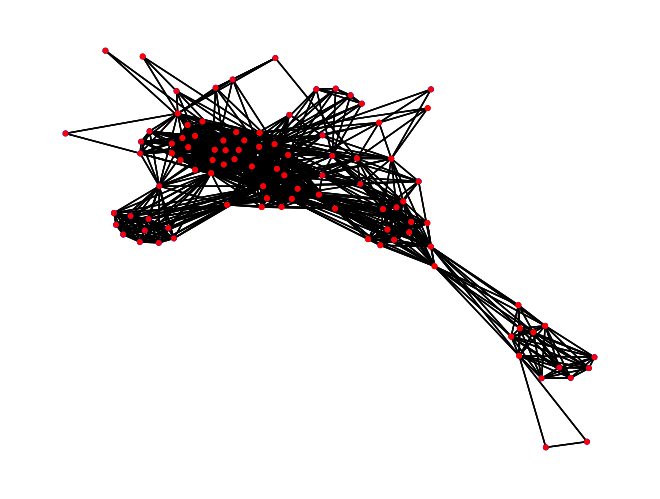

In [12]:
def nextNode(G, Visited, next):
    """Select the next nodes to be infected based on the Visited list of nodes"""
    target=[]
    for j in range (len(next)):
        neighbors = list(nx.neighbors(G,next[j]))
        for i in range(len(neighbors)):
            if neighbors[i] not in target and neighbors[i] not in Visited:
                target.append(neighbors[i])
        
    
    
    Visited.extend(target)
    return Visited, target
    
def ShowGraph(G,i, Visited):
    """Display the graph with nodes red=infected blue=not infected"""
    color=[]
    for node in G:
        if node in Visited:
            color.append('red')
        else: 
            color.append('blue')  
   

    nx.draw(G,nx.spring_layout(G, seed=41),node_color=color,node_size=10)
    imageName = "images/"+str(i)
    plt.savefig(imageName)
        
        
def truncate(path):
    """Delete images created for the rapport"""
    files = glob.glob(path+'/*.*')
    for f in files:
        os.remove(f)

def cascade(G,starts,show):
    """Algorithme independent cascade model"""
    nodes_visited=starts
    next_node=starts
    spreading_curve=[]


    
    i=1
    #truncate("images")
    while (True):
        
        spreading_curve.append(len(nodes_visited))
        if(show==True):
            ShowGraph(G,i,nodes_visited )
        
        nodes_visited, next_node= nextNode(G, nodes_visited , next_node)
        
        i=i+1
        if (len(next_node) == 0):
            break
        

    return spreading_curve        
    
    

spreading_curve = cascade(graph_net,random.sample(range(0, nx.number_of_nodes(graph_net)),5),True)
plt.show()

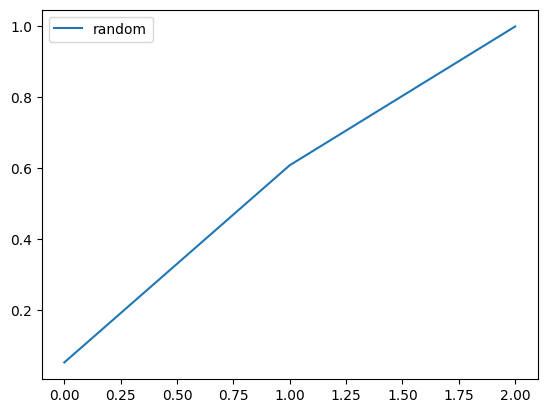

In [13]:
def plotSpreadingCurve(spreading_curve, title):
    """Display the spreading curve"""
    for i in range (len(spreading_curve)):
        spreading_curve[i]=spreading_curve[i]/97
    plt.plot(spreading_curve,label=title)
    plt.legend()
    
plotSpreadingCurve(spreading_curve, "random")

In [14]:
def create_gif():
    # filepaths
    fp_in = "images/*.png"
    fp_out = "gif.gif"


    imgs = (Image.open(f) for f in sorted(glob.glob(fp_in)))
    img = next(imgs)  # extract first image from iterator
    img.save(fp=fp_out, format='GIF', append_images=imgs,
            save_all=True, duration=1000, loop=0)


![my_awesome.gif](gif.gif)




In [15]:
all_nodes = graph_net.nodes
def compute_independent_cascade(graph, seed_nodes, prob, n_iters=85):
    total_spead = 0
    
    # simulate the spread process over multiple runs
    for i in range(n_iters):
        np.random.seed(i+10)
        active = seed_nodes[:]
        new_active = seed_nodes[:]
        
        # for each newly activated nodes, find its neighbors that becomes activated
        while new_active:
            activated_nodes = []
            for node in new_active:
                neighbors = set(graph_net.neighbors(node))
                success = np.random.uniform(0, 1) < prob
                activated_nodes += list(np.extract(success, list(neighbors)))

            # ensure the newly activated nodes doesn't already exist
            # in the final list of activated nodes before adding them
            # to the final list

            new_active = list(set(activated_nodes) - set(active))
            active += new_active

        total_spead += len(active)

    return total_spead / n_iters

def greedy(graph, k, prob, n_iters):
    """
    Find k nodes with the largest spread (determined by IC) from a igraph graph
    using the Greedy Algorithm.
    """

    # we will be storing elapsed time and spreads along the way, in a setting where
    # we only care about the final solution, we don't need to record these
    # additional information

    elapsed = []
    spreads = []
    solution = []
    start_time = time.time()
    
    for _ in range(k):
        best_node = -1
        best_spread = -np.inf
        
        # loop over nodes that are not yet in our final solution
        # to find biggest marginal gain
        
        for node in all_nodes:
            spread = compute_independent_cascade(graph, solution + [node], prob, n_iters)
            if spread > best_spread:
                best_spread = spread
                best_node = node
                
        solution.append(best_node)
        spreads.append(best_spread)

        elapse = round(time.time() - start_time, 3)
        elapsed.append(elapse)

    return solution, spreads, elapsed
seed_nodes = [0]
prob = 0.11
n_iters = 1000
greedy_solution, greedy_spreads, greedy_elapsed = greedy(graph_net, 5, prob, n_iters)
print('solution: ', greedy_solution)
print('spreads: ', greedy_spreads)
print('elapsed: ', greedy_elapsed)

solution:  [14, 3, 30, 89, 25]
spreads:  [1.138, 2.253, 3.377, 4.498, 5.605]
elapsed:  [4.106, 11.757, 22.565, 35.23, 49.981]


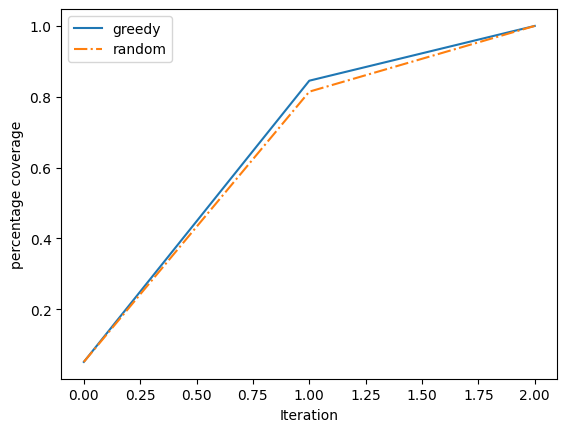

In [20]:
def plot_compar():
    """Plot the comparaison between random and greedy algorithms"""
    SC = cascade(graph_net, [14, 3, 30, 89, 25],False)
    for i in range (len(SC)):
        SC[i]=SC[i]/97

    plt.plot(SC,label="greedy")

    spreading_curve = cascade(graph_net,random.sample(range(0, nx.number_of_nodes(graph_net)), 5),False)
    for j in range (len(spreading_curve)):
        spreading_curve[j]=spreading_curve[j]/97
    plt.plot(spreading_curve,'-.',label="random")

        
    for i in range (0):
        spreading_curve = cascade(graph_net,random.sample(range(0, nx.number_of_nodes(graph_net)), 5),False)
        for j in range (len(spreading_curve)):
            spreading_curve[j]=spreading_curve[j]/97
        plt.plot(spreading_curve,'-.')

    plt.legend()
    plt.ylabel('percentage coverage')
    plt.xlabel("Iteration")
    plt.show()
    return SC , spreading_curve
spreading_curve_greedy ,spreading_curve_random = plot_compar()



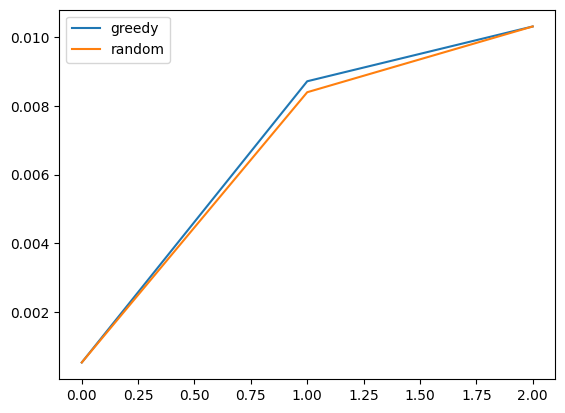

In [21]:
plotSpreadingCurve(spreading_curve_greedy, "greedy")
plotSpreadingCurve(spreading_curve_random, "random")

*Barabasi Albert*

[14, 3, 30, 89, 25]


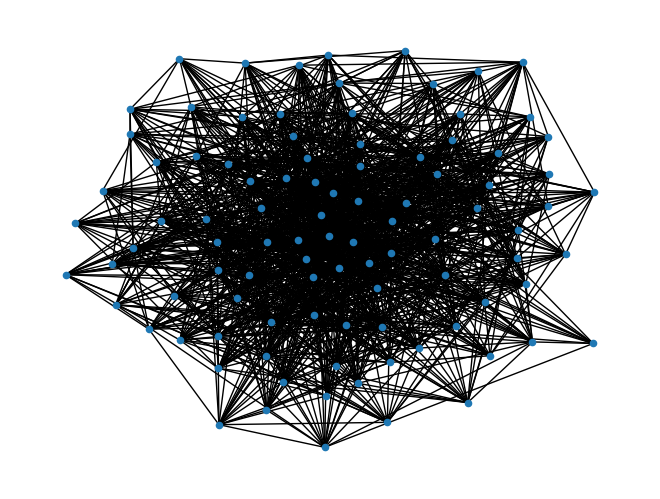

In [23]:
def Barabasi_Albert(G):
    """Create Barabasi Albert network"""
    BA = nx.barabasi_albert_graph(nx.number_of_nodes(G), 17)
    nx.draw(BA,node_size=20)
    return BA

BA =Barabasi_Albert(graph_net)
BA_greedy_solution, greedy_spreads, greedy_elapsed = greedy(BA, 5, prob, 1000)
print(BA_greedy_solution)



[5, 83, 97]
[5, 83, 97]


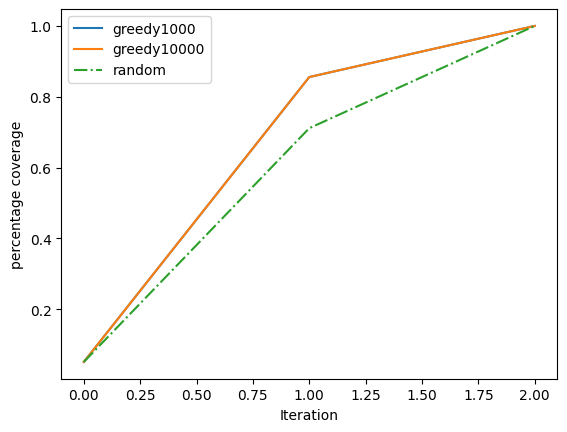

In [24]:
SC = cascade(BA, [14, 3, 30, 89, 25],False)
print(SC)
for i in range (len(SC)):
    SC[i]=SC[i]/97
plt.plot(SC,label="greedy1000")


SC1 = cascade(BA, [14, 30, 89, 25, 3],False)
print(SC1)
for i in range (len(SC1)):
    SC1[i]=SC1[i]/97
plt.plot(SC1,label="greedy10000")

spreading_curve = cascade(BA,random.sample(range(0, nx.number_of_nodes(BA)), 5),False)
for j in range (len(spreading_curve)):
    spreading_curve[j]=spreading_curve[j]/97
plt.plot(spreading_curve,'-.',label="random")
    
for i in range (0):
    spreading_curve = cascade(BA,random.sample(range(0, nx.number_of_nodes(BA)), 5),False)
    for j in range (len(spreading_curve)):
        spreading_curve[j]=spreading_curve[j]/97
    plt.plot(spreading_curve,'-.')
    
    
plt.legend()
plt.ylabel('percentage coverage')
plt.xlabel("Iteration")
plt.show()